In [23]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install mlxtend

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKL

In [24]:
# Bibliotecas para ler/manipular/ver nossos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# biblioteca para criar o modelo de ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# Biblioteca para plotar nosso modelo
from mlxtend.plotting import plot_decision_regions

In [18]:
df = pd.read_csv('Data.csv')
df.drop(columns=['sl_no'])
# gender = genero
# ssc_p = nota do ensino fundamental 
# ssc_b = tipo de escola (publica, privada)
# hsc_p = nota do ensino medio
# hsc_b = tipo de escola (publica, privada)
# hsc_s = ensino técnico (tipo etec)
# degree_p = media ponderada
# workex  = experiencia de trabalho (estágio etc)
# etest_p = nota dentro da universidade como um todo (nota ponderada)
# specialisation = qual mba ele fez
# mba_p = nota do mba
# status = ta empregado ou nao
# salary = se tiver empregado, qual é o salario

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [13]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [19]:
df.info()
# object é um tipo de string
# float64 usado como numero decimais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [20]:
df.describe()
# descreve os tipos de variaveis numéricas

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [22]:
df.describe(include=['object'])
# descreve os tipos de variáveis string

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [27]:
# remover as linhas da coluna "degree_t" que contém "Others"
df = df[df['degree_t'] != "Others"]

In [31]:
# substituir salários Nan por 0
df['salary'].fillna(0)

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 204, dtype: float64

In [33]:
# ver qual é a mediana do salário
df['salary'].describe()

count       204.000000
mean     202544.117647
std      154464.984840
min           0.000000
25%           0.000000
50%      240000.000000
75%      285500.000000
max      940000.000000
Name: salary, dtype: float64

In [35]:
# salários que são menores que 240000 serão 0
# salários que são maiores ou igual que 240000 serão 1
df.loc[df['salary'] < 240000, 'salary'] = 0
df.loc[df['salary'] >= 240000, 'salary'] = 1

In [37]:
# checar a coluna salary, ver os valores valores possíveis (agora 0 e 1)
df['salary'].unique()

array([1., 0.])

In [40]:
# Binarizar (ou one-hot encode) colunas categóricas (string), transformando cada categoria única em uma nova coluna com valores 0 ou 1
df_dummy = pd.get_dummies(df)

In [39]:
df_dummy.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,1.0,False,True,False,...,True,False,False,True,True,False,False,True,False,True
1,2,79.33,78.33,77.48,86.5,66.28,0.0,False,True,True,...,False,True,False,True,False,True,True,False,False,True
2,3,65.00,68.00,64.00,75.0,57.80,1.0,False,True,True,...,False,False,True,False,True,False,True,False,False,True
3,4,56.00,52.00,52.00,66.0,59.43,0.0,False,True,True,...,False,True,False,True,True,False,False,True,True,False
4,5,85.80,73.60,73.30,96.8,55.50,1.0,False,True,True,...,True,False,True,False,True,False,True,False,False,True


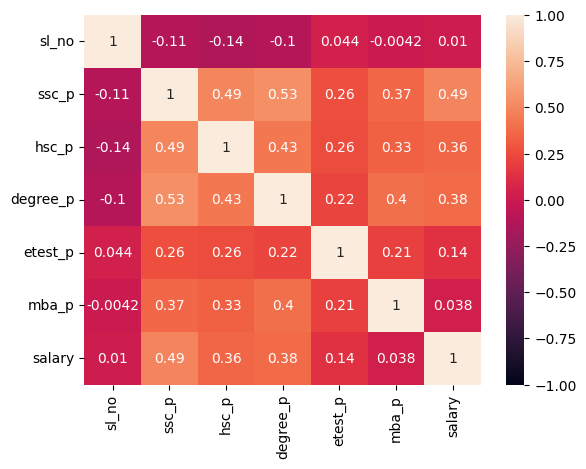

In [44]:
# analisando por linha, a linha salário, 
# olhando por coluna, 
# a coluna sl_no exploca 0.01 a variavel salary 
# a coluna ssc_p exploca 0.49 a variavel salary 
# a coluna hsc_p exploca 0.36 a variavel salary
# assim por diante
# ou seja, o salário de 1 é decorrente ao ssc_p, mba_p, hsc_p e degree_p 
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [45]:
# analise grafica

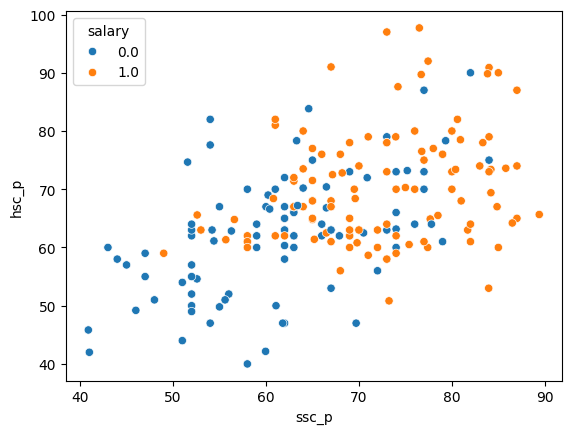

In [46]:
# circulos azuis são pessoas que tem salário abaixo da mediana
# circulos laranjas são pessoas que tem salário acima da mediana
ssc_p = salario
# podemos ver que quanto maior as pessoas com maiores notas do ensino fundamental e nota do ensino medio
# maiores são os salários acima da mediana
sns.scatterplot(data=df, x='ssc_p', y='hsc_p', hue='salary')
plt.show()